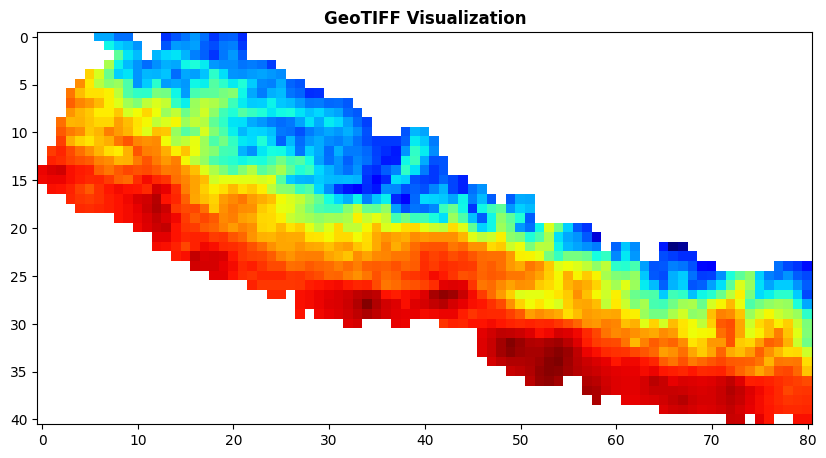

In [2]:

import rasterio
from rasterio.plot import show
import matplotlib.pyplot as plt

# Path to your GeoTIFF file
geo_tiff_path = "real_final_temperature_output_raster_0.1_277_1993-01-03.tif"

# Open the GeoTIFF file
with rasterio.open(geo_tiff_path) as src:
    # Read the raster data (band 1)
    raster_data = src.read(1)

    # Visualize the raster data
    plt.figure(figsize=(10, 10))
    show(raster_data, cmap="jet", title="GeoTIFF Visualization")
    plt.show()

In [18]:
import pandas as pd
import numpy as np
df = pd.read_csv('Kathmandu_precipitaiton_daily.csv')

df = df.iloc[4:]

df.columns = ['year','month','day','temperature']
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['temperature'] = df['temperature'].astype(float)

df['date'] = pd.to_datetime(df[['year', 'month', 'day']].astype(int).astype(str).agg('-'.join, axis=1))
df=df.drop(['year','month','day'],axis=1)
df.set_index('date',inplace=True)

df['temperature'] = df['temperature'].replace(-9999,np.nan)
boolean_df = df['temperature'].isna()

year_list = []
month_list = []
value_list = []

for (year, month), data in df.groupby([df.index.year, df.index.month]):
    monthly_boolean_mask = data['temperature'].isna().values
    boolean_series = data['temperature'].isna()
    number_of_valid_days = len(boolean_series[boolean_series==False])
    length_check = number_of_valid_days >= .8*len(boolean_series)
    
    consecutive_days_missings = np.convolve(monthly_boolean_mask, np.ones(4), mode='valid') >= 4
    
    year_list.append(year)
    month_list.append(month)
    
    if np.sum(consecutive_days_missings) >= 4 and not length_check :
        value_list.append('null')
    else:
        sum_value = data['temperature'].sum()
        value_list.append(sum_value)

result_df = pd.DataFrame({'year': year_list, 'month': month_list, 'precipiation_mean': value_list})
print(result_df)

     year  month precipiation_mean
0    1991      1              20.7
1    1991      2              11.4
2    1991      3              45.2
3    1991      4             106.3
4    1991      5             145.3
..    ...    ...               ...
391  2023      8            388.64
392  2023      9            269.75
393  2023     10             79.82
394  2023     11              0.01
395  2023     12              null

[396 rows x 3 columns]


In [26]:
import pandas as pd
import numpy as np
df = pd.read_csv('Kathmandu_precipitaiton_daily.csv')

df = df.iloc[4:]

df.columns = ['year','month','day','temperature']
df['year'] = df['year'].astype(int)
df['month'] = df['month'].astype(int)
df['day'] = df['day'].astype(int)
df['temperature'] = df['temperature'].astype(float)

df['date'] = pd.to_datetime(df[['year', 'month', 'day']].astype(int).astype(str).agg('-'.join, axis=1))
df=df.drop(['year','month','day'],axis=1)
df.set_index('date',inplace=True)

df['temperature'] = df['temperature'].replace(-9999,np.nan)
year_list = []
season_list = []
value_list = []
target_season = [10,11,12]
df = df[df.index.month.isin(target_season)]

for (year,_) ,data in df.groupby([df.index.year,df.index.month.isin(target_season)]):
    season_boolean_mask = data['temperature'].isna().values
    boolean_series = data['temperature'].isna()
    number_of_valid_days = len(boolean_series[boolean_series==False])
    length_check = number_of_valid_days >= .8*len(boolean_series)
    print(length_check)
    consecutive_days_missings = np.convolve(season_boolean_mask, np.ones(4), mode='valid') >= 4
    year_list.append(year)
    season_list.append('monsoon')
    if np.sum(consecutive_days_missings) >= 0 and not length_check :
        value_list.append('null')
    else:
        sum_value = data['temperature'].sum()
        value_list.append(sum_value)
result_df = pd.DataFrame({'year': year_list, 'season': season_list, 'precipiation_sum': value_list})
print(result_df)
    

True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
True
False
    year   season precipiation_sum
0   1991  monsoon             25.5
1   1992  monsoon             69.6
2   1993  monsoon             16.3
3   1994  monsoon             12.0
4   1995  monsoon            106.9
5   1996  monsoon             52.4
6   1997  monsoon            104.3
7   1998  monsoon             56.2
8   1999  monsoon            153.4
9   2000  monsoon              0.8
10  2001  monsoon             20.5
11  2002  monsoon             41.5
12  2003  monsoon             36.3
13  2004  monsoon            156.5
14  2005  monsoon            126.1
15  2006  monsoon             62.9
16  2007  monsoon             21.7
17  2008  monsoon             10.3
18  2009  monsoon             76.1
19  2010  monsoon             24.5
20  2011  monsoon             25.9
21  2012  monsoon             13.9
22  2013  monsoon            

         date  Syangja  Jajarkot  Simara.Airport  Parwanipur  Birganj  Gaur  \
0  1947-01-01      NaN       NaN             NaN         NaN      NaN   NaN   
1  1947-01-02      NaN       NaN             NaN         NaN      NaN   NaN   
2  1947-01-03      NaN       NaN             NaN         NaN      NaN   NaN   
3  1947-01-04      NaN       NaN             NaN         NaN      NaN   NaN   
4  1947-01-05      NaN       NaN             NaN         NaN      NaN   NaN   

   Janakpur.Airport  Hardinath  Manusmara  ...  Pokhara.Airport  Bandipur  \
0               NaN        NaN        NaN  ...              NaN       NaN   
1               NaN        NaN        NaN  ...              NaN       NaN   
2               NaN        NaN        NaN  ...              NaN       NaN   
3               NaN        NaN        NaN  ...              NaN       NaN   
4               NaN        NaN        NaN  ...              NaN       NaN   

   Chapakot  Lumle  Khairini.Tar  Damauli  Gorkha..Birenchowk.